In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import statsmodels.api as sm

/home/moreno/anaconda2/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## Business Understanding

>For kc_data_proce data set we are intended to understand which factors influence linearly house's prices in KC USA
With this in mind we shall try to create an algorithm (Model) which can help people who is planning to purchase a house in KC, what and in what measure, some factors will increase/decrease the investment to be made

## Exploratory Data Analysis

In [3]:
df=pd.read_csv('/home/moreno/Desktop/DataScienceAcademy/data-science-academy-mx/kc_house_data.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [9]:
df.drop(['lat','long','zipcode','id','date'],axis=1,inplace=True)

In [10]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,6210.000000,871200.000000


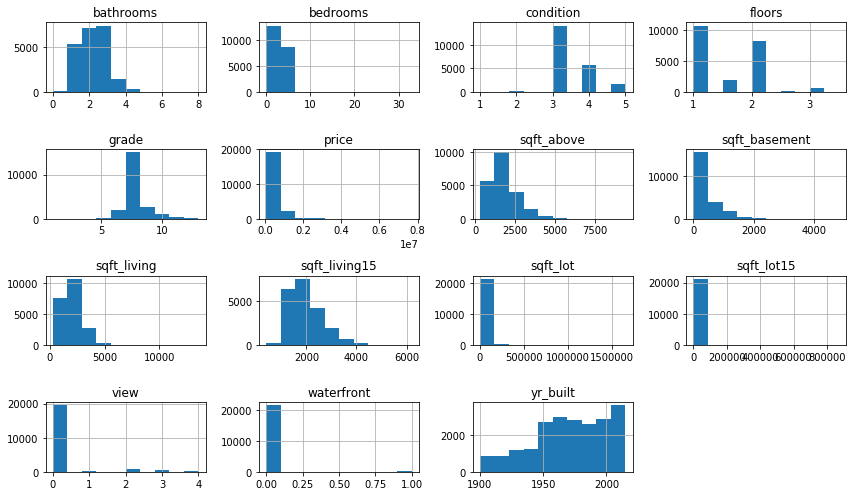

In [108]:
df.hist(figsize=(12,7))
plt.tight_layout()

In [30]:
df.drop(['yr_renovated'],axis=1,inplace=True)

In [35]:
house_chars=['bathrooms','bedrooms','floors','condition'] 

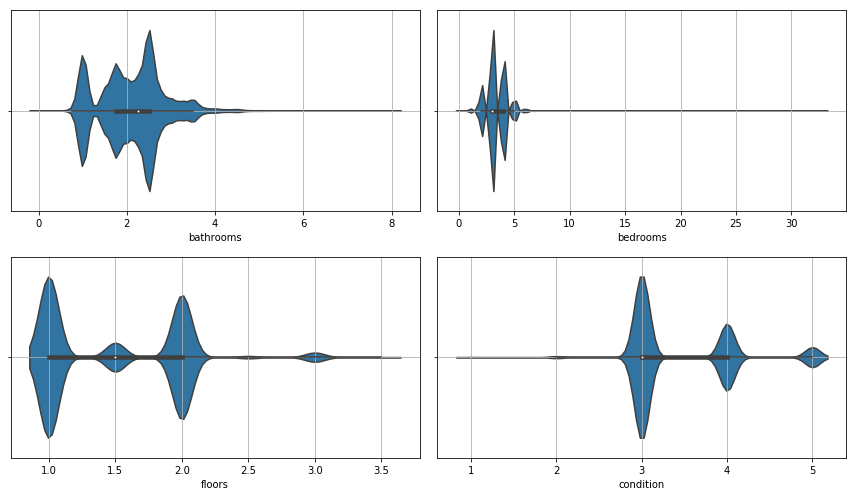

In [41]:
plt.figure(figsize=(12,7))
for i,j in enumerate(house_chars):
    plt.subplot(2,2,i+1)
    sns.violinplot(x=j,data=df)
    plt.grid()
    plt.tight_layout()


<Figure size 864x504 with 0 Axes>

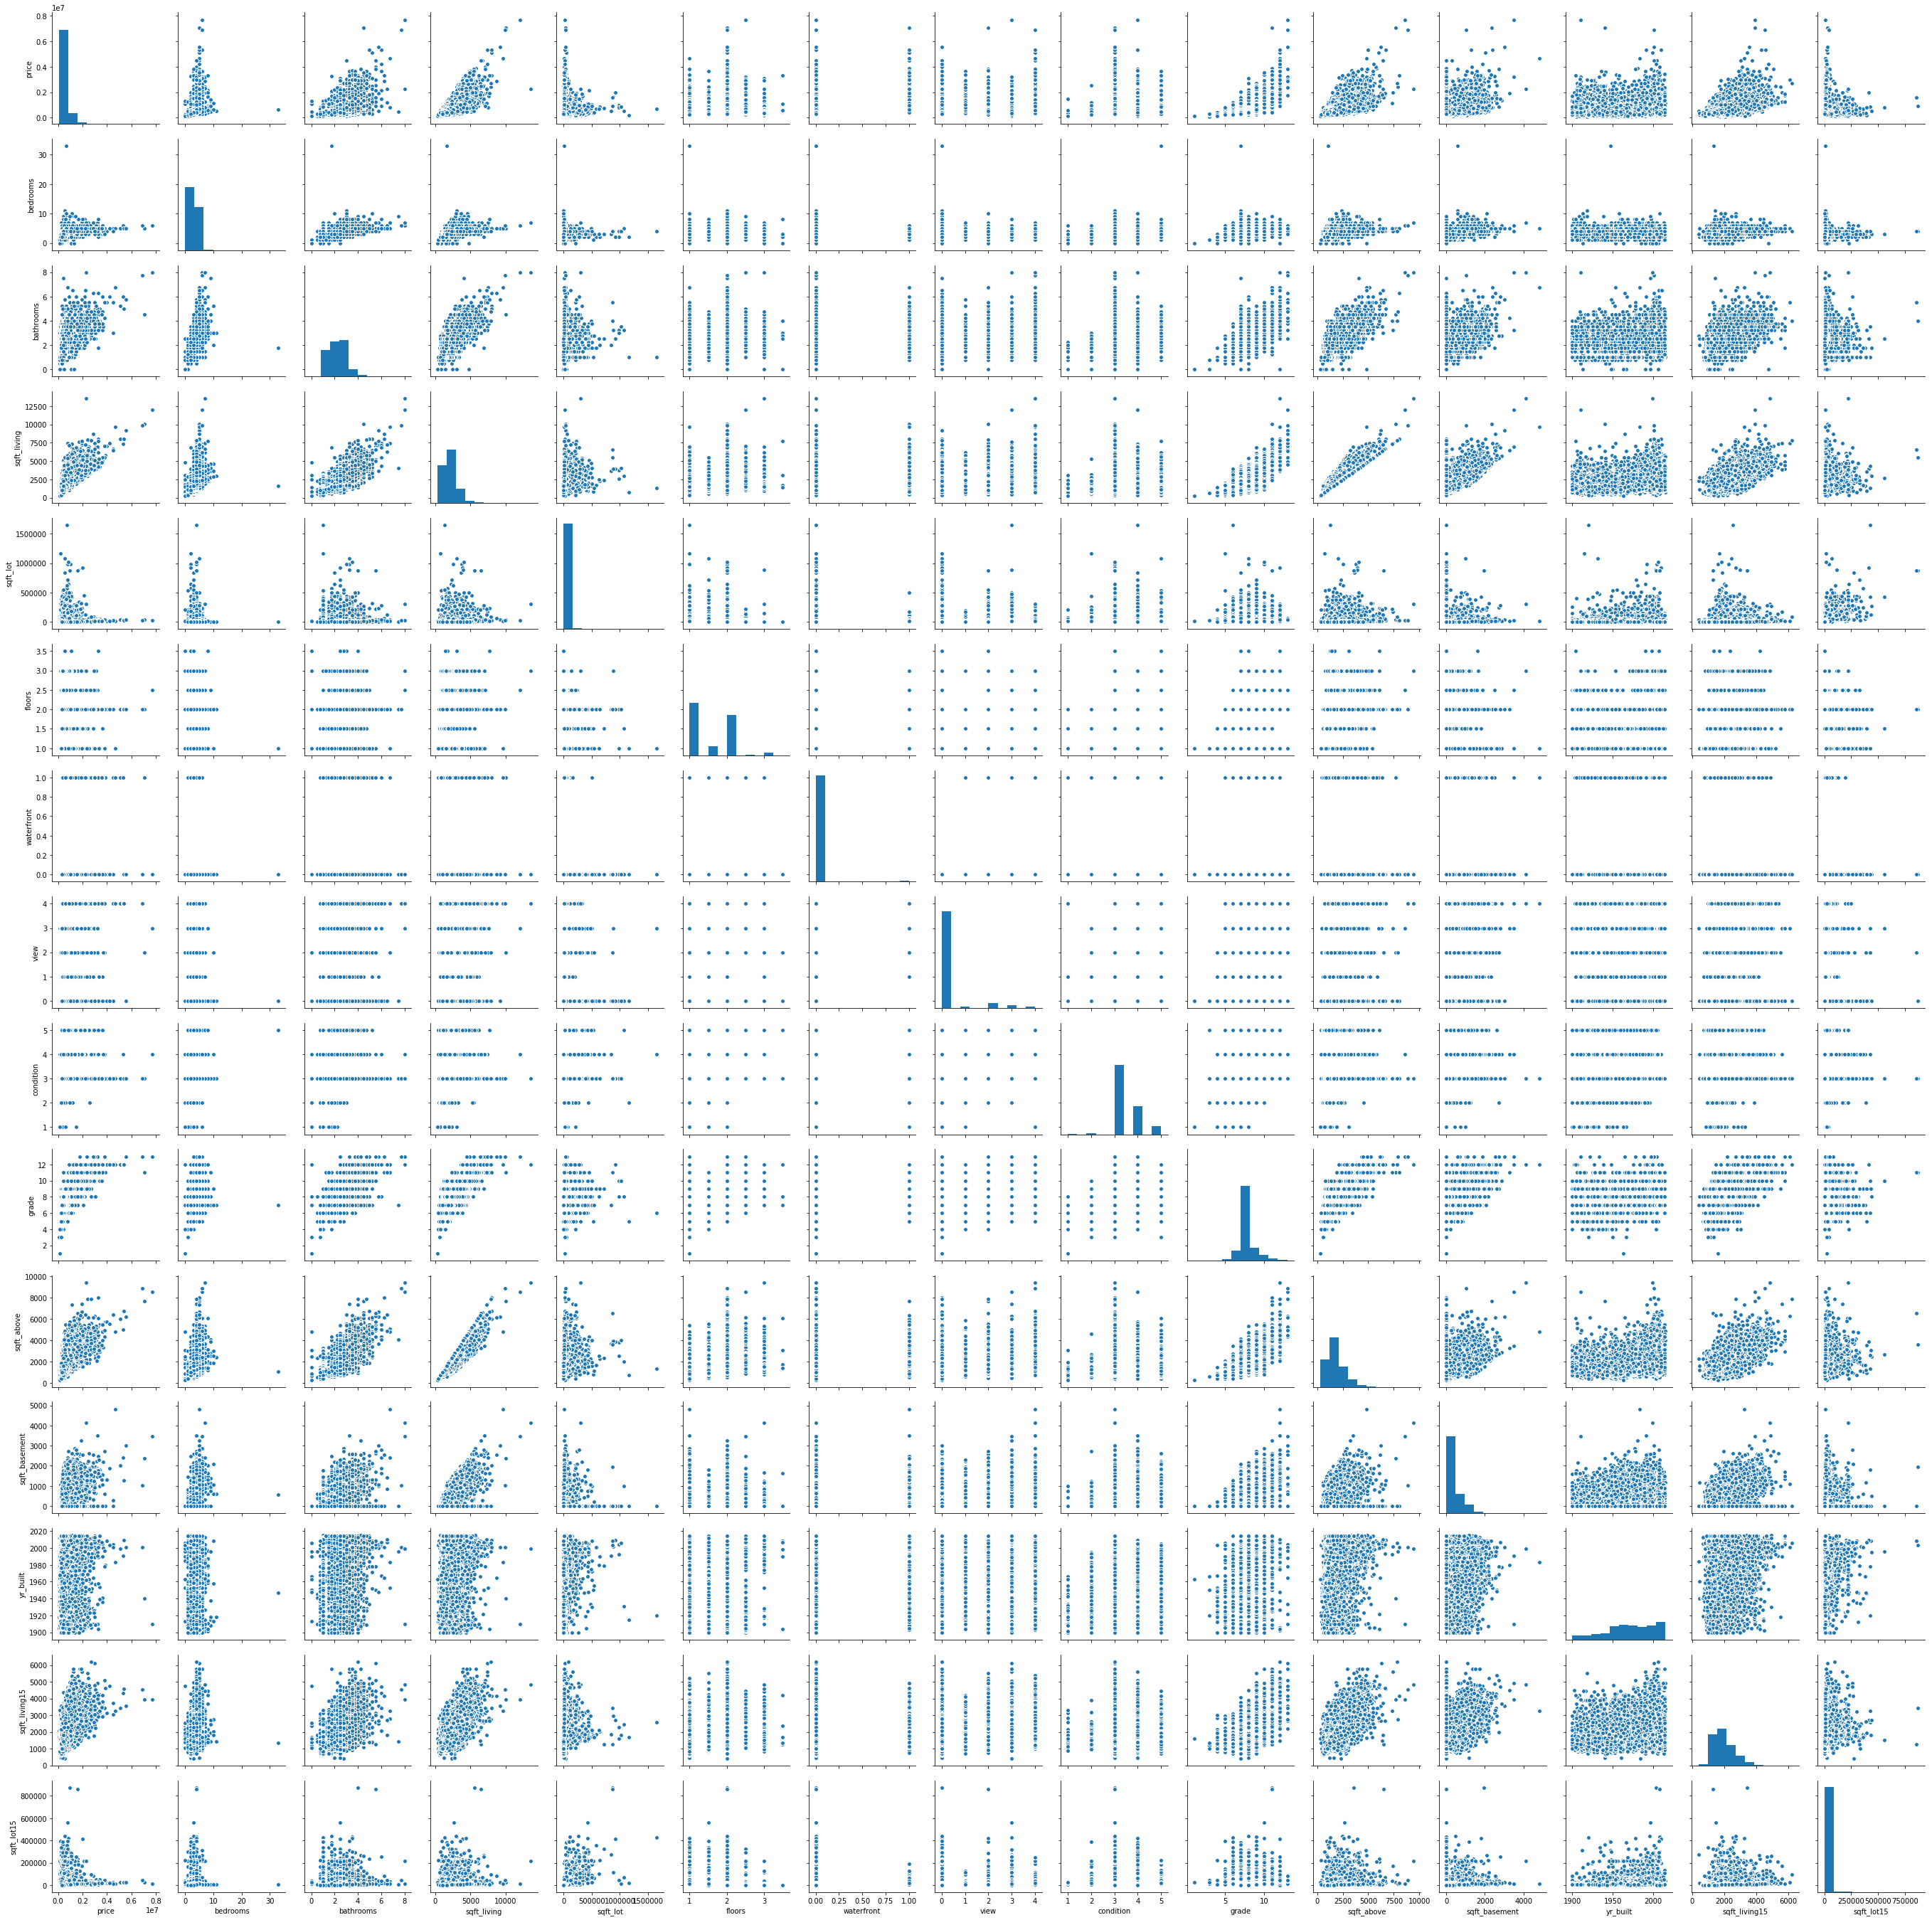

In [32]:
plt.figure(figsize=(12,7))
sns.pairplot(df)

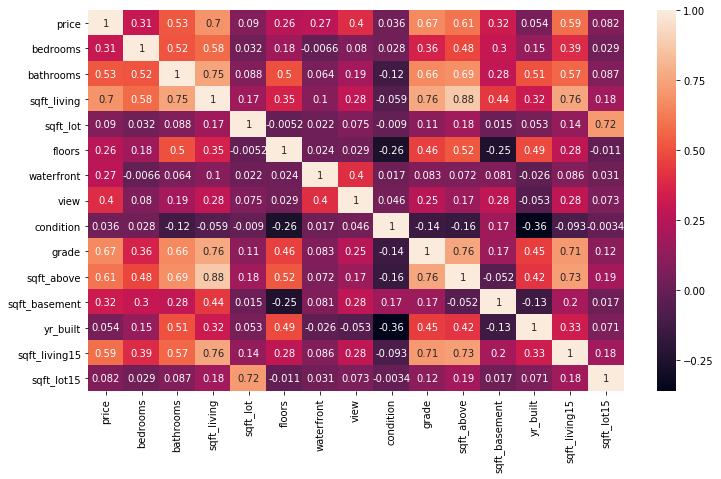

In [46]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(),annot=True)

In [61]:
from sklearn.feature_selection import SelectKBest,f_regression,mutual_info_regression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split

In [62]:
y=df.price
X=df.drop(['price'],axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3)

In [82]:
ols=sm.OLS(y,sm.add_constant(X)).fit()

In [83]:
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.654
Model:                            OLS   Adj. R-squared:                  0.653
Method:                 Least Squares   F-statistic:                     3135.
Date:                Fri, 11 Jan 2019   Prob (F-statistic):               0.00
Time:                        16:12:20   Log-Likelihood:            -2.9615e+05
No. Observations:               21613   AIC:                         5.923e+05
Df Residuals:                   21599   BIC:                         5.924e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          6.312e+06   1.31e+05     48.200      0.000    6.06e+06    6.57e+06
bedrooms      -3.946e+04   2026.024    -19.476      0.000   -4.34e+04   -3.55e+04
bathrooms      4.694e+04   3462.466     13.556      0.000    4.02e+04    5.37e+04
sqft_living     109.2967      2.435     44.883      0.000     104.524     114.070
sqft_lot         -0.0027      0.051     -0.052      0.958      -0.103       0.098
floors         2.726e+04   3781.479      7.209      0.000    1.98e+04    3.47e+04
waterfront     5.818e+05   1.86e+04     31.262      0.000    5.45e+05    6.18e+05
view            4.34e+04   2272.594     19.097      0.000    3.89e+04    4.79e+04
condition      1.844e+04   2462.972      7.488      0.000    1.36e+04    2.33e+04
grade          1.198e+05   2248.944     53.290      0.000    1.15e+05    1.24e+05
sqft_above       51.5841      2.356     21.893      0.000      46.966      56.202
sqft_basement    57.7129      2.782     20.743      0.000      52.259      63.166
yr_built      -3628.5789     67.336    -53.888      0.000   -3760.562   -3496.596
sqft_living15    24.4796      3.598      6.804      0.000      17.428      31.531
sqft_lot15       -0.5465      0.078     -6.974      0.000      -0.700      -0.393
==============================================================================
Omnibus:                    16334.141   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1194992.312
Skew:                           3.031   Prob(JB):                         0.00
Kurtosis:                      38.920   Cond. No.                     7.89e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.9e-19. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## Utilizando Sklearn

In [98]:
def metricas(modelo,X_train,X_test,y_train,y_test):
    print 'Train Rsquared: %.3f | Test Rsquared:  %.3f \nTrain MSE: %.3f  | Test MSE: %.3f ' %(r2_score(y_train,modelo.predict(X_train)),r2_score(y_test,modelo.predict(X_test)),mean_squared_error(y_train,modelo.predict(X_train)),mean_squared_error(y_test,modelo.predict(X_test)))

In [109]:
lm=LinearRegression(fit_intercept=True).fit(X_train,y_train)

In [99]:
metricas(lm,X_train,X_test,y_train,y_test)

Train Rsquared: 0.652 | Test Rsquared:  0.656 
Train MSE: 45450902428.238  | Test MSE: 49776219398.639 
